In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_narr = pd.read_csv('/content/drive/MyDrive/Classes/2 Practicum/[For Classmates 3-Feb-2021] cfpb_cleaned/data_files/STM/stm_labeled_data')

In [ ]:
df_narr.shape

(657663, 35)

In [ ]:
df_narr.head()

,Unnamed: 0,X,Date.received,Product,Sub.product,Issue,Sub.issue,Consumer.complaint.narrative,Company.public.response,Company,State,ZIP.code,Tags,Consumer.consent.provided.,Submitted.via,Date.sent.to.company,Company.response.to.consumer,Timely.response.,Consumer.disputed.,Complaint.ID,Complaint.length,Credit Report Inaccuracies,Unauthorised Accounts and Credit Inquiries,"Debt: Financing Issues, Wage Garnishment",Identity Theft,Car Dealerships & Automobiles,Loan Mismanagement & Misinformation,Lawsuits,Disputing Late Payments,"Response Time, Disputing Responses/Follow-up Actions",Credit Card Promotions/Offers,Bank Account Mismanagement: Deposits and Checks,"Harassment, Robo-calls",Debt: Disputing Validity,???
0,1,0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld system inc try collect debt mine ow...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392,18,0.096474,0.078254,0.072441,0.026175,0.011058,0.004998,0.018770,0.022178,0.055505,0.006972,0.002848,0.043599,0.553171,0.007557
1,2,1,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,past week receive excessive amount telephone c...,NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198,78,0.019815,0.019204,0.158436,0.010826,0.019941,0.021786,0.025619,0.055491,0.034353,0.028507,0.024002,0.448207,0.127478,0.006335
2,3,2,2019-09-15,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,pioneer commit several federal violation priva...,NaN,Pioneer Capital Solutions Inc,CA,925XX,NaN,Consent provided,Web,2019-09-15,Closed with explanation,Yes,NaN,3374555,152,0.011814,0.021889,0.026804,0.040312,0.005265,0.005686,0.490380,0.005838,0.025370,0.011836,0.005633,0.015032,0.325756,0.008387
3,4,3,2019-07-26,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,previously request experian send copy verifiab...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,914XX,NaN,Consent provided,Web,2019-07-26,Closed with explanation,Yes,NaN,3319331,171,0.134283,0.070862,0.003823,0.011455,0.004021,0.001923,0.008228,0.018626,0.709530,0.004819,0.002392,0.014312,0.011864,0.003862
4,5,4,2019-07-08,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,hello complaint three credit report company tr...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,109XX,NaN,Consent provided,Web,2019-07-08,Closed with explanation,Yes,NaN,3299394,428,0.145764,0.159703,0.045046,0.068835,0.010620,0.002595,0.015779,0.010961,0.332880,0.015450,0.036293,0.119049,0.022445,0.014582


In [ ]:
df_narr.columns

Index(['Unnamed: 0', 'X', 'Date.received', 'Product', 'Sub.product', 'Issue',
       'Sub.issue', 'Consumer.complaint.narrative', 'Company.public.response',
       'Company', 'State', 'ZIP.code', 'Tags', 'Consumer.consent.provided.',
       'Submitted.via', 'Date.sent.to.company', 'Company.response.to.consumer',
       'Timely.response.', 'Consumer.disputed.', 'Complaint.ID',
       'Complaint.length', 'Credit Report Inaccuracies',
       'Unauthorised Accounts and Credit Inquiries',
       'Debt: Financing Issues, Wage Garnishment', 'Identity Theft',
       'Car Dealerships & Automobiles', 'Loan Mismanagement & Misinformation',
       'Lawsuits', 'Disputing Late Payments',
       'Response Time, Disputing Responses/Follow-up Actions',
       'Credit Card Promotions/Offers',
       'Bank Account Mismanagement: Deposits and Checks',
       'Harassment, Robo-calls', 'Debt: Disputing Validity', '???'],
      dtype='object')

In [ ]:
df_narr.columns[::-1][0:14]

#topics

Index(['???', 'Debt: Disputing Validity', 'Harassment, Robo-calls',
       'Bank Account Mismanagement: Deposits and Checks',
       'Credit Card Promotions/Offers',
       'Response Time, Disputing Responses/Follow-up Actions',
       'Disputing Late Payments', 'Lawsuits',
       'Loan Mismanagement & Misinformation', 'Car Dealerships & Automobiles',
       'Identity Theft', 'Debt: Financing Issues, Wage Garnishment',
       'Unauthorised Accounts and Credit Inquiries',
       'Credit Report Inaccuracies'],
      dtype='object')

In [ ]:
df_probs = df_narr.iloc[:, ::-1].iloc[:, 0:14]

df_probs.head()

,???,Debt: Disputing Validity,"Harassment, Robo-calls",Bank Account Mismanagement: Deposits and Checks,Credit Card Promotions/Offers,"Response Time, Disputing Responses/Follow-up Actions",Disputing Late Payments,Lawsuits,Loan Mismanagement & Misinformation,Car Dealerships & Automobiles,Identity Theft,"Debt: Financing Issues, Wage Garnishment",Unauthorised Accounts and Credit Inquiries,Credit Report Inaccuracies
0,0.007557,0.553171,0.043599,0.002848,0.006972,0.055505,0.022178,0.018770,0.004998,0.011058,0.026175,0.072441,0.078254,0.096474
1,0.006335,0.127478,0.448207,0.024002,0.028507,0.034353,0.055491,0.025619,0.021786,0.019941,0.010826,0.158436,0.019204,0.019815
2,0.008387,0.325756,0.015032,0.005633,0.011836,0.025370,0.005838,0.490380,0.005686,0.005265,0.040312,0.026804,0.021889,0.011814
3,0.003862,0.011864,0.014312,0.002392,0.004819,0.709530,0.018626,0.008228,0.001923,0.004021,0.011455,0.003823,0.070862,0.134283
4,0.014582,0.022445,0.119049,0.036293,0.015450,0.332880,0.010961,0.015779,0.002595,0.010620,0.068835,0.045046,0.159703,0.145764


In [ ]:
top_topic = df_probs.idxmax(axis=1)
top_prob = df_probs.max(axis=1)
date_rec = df_narr['Date.received']

date_rec

0         2019-09-24
1         2019-11-08
2         2019-09-15
3         2019-07-26
4         2019-07-08
             ...    
657658    2016-07-11
657659    2017-01-24
657660    2015-03-26
657661    2015-12-12
657662    2016-08-09
Name: Date.received, Length: 657663, dtype: object

In [ ]:
df_topic = pd.concat([top_topic, top_prob, date_rec], axis = 1)

df_topic.columns =['Topic', 'max_prob', 'date_rec'] 

df_topic['date_rec'] = pd.to_datetime(df_topic['date_rec'])

df_topic['year'] = pd.DatetimeIndex(df_topic['date_rec']).year
df_topic['month'] = pd.DatetimeIndex(df_topic['date_rec']).month

df_topic 

,Topic,max_prob,date_rec,year,month
0,Debt: Disputing Validity,0.553171,2019-09-24,2019,9
1,"Harassment, Robo-calls",0.448207,2019-11-08,2019,11
2,Lawsuits,0.490380,2019-09-15,2019,9
3,"Response Time, Disputing Responses/Follow-up A...",0.709530,2019-07-26,2019,7
4,"Response Time, Disputing Responses/Follow-up A...",0.332880,2019-07-08,2019,7
...,...,...,...,...,...
657658,Disputing Late Payments,0.326516,2016-07-11,2016,7
657659,"Harassment, Robo-calls",0.452022,2017-01-24,2017,1
657660,Loan Mismanagement & Misinformation,0.362975,2015-03-26,2015,3
657661,Loan Mismanagement & Misinformation,0.392683,2015-12-12,2015,12


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_topic['Topic_Num'] = le.fit_transform(df_topic['Topic'])

In [ ]:
list(le.classes_)

['???',
 'Bank Account Mismanagement: Deposits and Checks',
 'Car Dealerships & Automobiles',
 'Credit Card Promotions/Offers',
 'Credit Report Inaccuracies',
 'Debt: Disputing Validity',
 'Debt: Financing Issues, Wage Garnishment',
 'Disputing Late Payments',
 'Harassment, Robo-calls',
 'Identity Theft',
 'Lawsuits',
 'Loan Mismanagement & Misinformation',
 'Response Time, Disputing Responses/Follow-up Actions',
 'Unauthorised Accounts and Credit Inquiries']

In [ ]:
df_topic.head()

,Topic,max_prob,date_rec,year,month,Topic_Num
0,Debt: Disputing Validity,0.553171,2019-09-24,2019,9,5
1,"Harassment, Robo-calls",0.448207,2019-11-08,2019,11,8
2,Lawsuits,0.490380,2019-09-15,2019,9,10
3,"Response Time, Disputing Responses/Follow-up A...",0.709530,2019-07-26,2019,7,12
4,"Response Time, Disputing Responses/Follow-up A...",0.332880,2019-07-08,2019,7,12


# COVID - Regression Discontinuity Design (RDD) for Topics

### Preprocessing:

Reference: https://matheusfacure.github.io/python-causality-handbook/16-Regression-Discontinuity-Design.html 

In [ ]:
df_topic['month_year'] = df_topic['date_rec'].dt.to_period('M')

In [ ]:
df_topic.head()

,Topic,max_prob,date_rec,year,month,Topic_Num,month_year
0,Debt: Disputing Validity,0.553171,2019-09-24,2019,9,5,2019-09
1,"Harassment, Robo-calls",0.448207,2019-11-08,2019,11,8,2019-11
2,Lawsuits,0.490380,2019-09-15,2019,9,10,2019-09
3,"Response Time, Disputing Responses/Follow-up A...",0.709530,2019-07-26,2019,7,12,2019-07
4,"Response Time, Disputing Responses/Follow-up A...",0.332880,2019-07-08,2019,7,12,2019-07


In [ ]:
df_topic['month_year'].max()

Period('2021-01', 'M')

In [ ]:
df_covid = df_topic[(df_topic['month_year'] > '2019-01') & (df_topic['month_year'] < '2021-01')]

df_covid

,Topic,max_prob,date_rec,year,month,Topic_Num,month_year
0,Debt: Disputing Validity,0.553171,2019-09-24,2019,9,5,2019-09
1,"Harassment, Robo-calls",0.448207,2019-11-08,2019,11,8,2019-11
2,Lawsuits,0.490380,2019-09-15,2019,9,10,2019-09
3,"Response Time, Disputing Responses/Follow-up A...",0.709530,2019-07-26,2019,7,12,2019-07
4,"Response Time, Disputing Responses/Follow-up A...",0.332880,2019-07-08,2019,7,12,2019-07
...,...,...,...,...,...,...,...
657485,Credit Report Inaccuracies,0.240331,2019-02-19,2019,2,4,2019-02
657486,"Harassment, Robo-calls",0.301415,2019-02-08,2019,2,8,2019-02
657487,"Debt: Financing Issues, Wage Garnishment",0.278512,2019-02-20,2019,2,6,2019-02
657491,"Debt: Financing Issues, Wage Garnishment",0.374799,2019-03-05,2019,3,6,2019-03


In [ ]:
list(le.classes_)

['???',
 'Bank Account Mismanagement: Deposits and Checks',
 'Car Dealerships & Automobiles',
 'Credit Card Promotions/Offers',
 'Credit Report Inaccuracies',
 'Debt: Disputing Validity',
 'Debt: Financing Issues, Wage Garnishment',
 'Disputing Late Payments',
 'Harassment, Robo-calls',
 'Identity Theft',
 'Lawsuits',
 'Loan Mismanagement & Misinformation',
 'Response Time, Disputing Responses/Follow-up Actions',
 'Unauthorised Accounts and Credit Inquiries']

### What is RDD:

**Output from STM**: 
- We get 14 Probabilities per Complaint, persuant to each Topic.
- We assign each Complaint to a Topic given their highest probability out of the 14, `max_prob`. 

This is not an even distribution: 

```
8     108370
11     69219
13     68308
12     64378
4      58759
1      47146
7      45332
6      43343
5      42944
3      41239
2      24549
10     24018
9      18715
0       1343
Name: Topic_Num, dtype: int64

```
- We also use the numerical value of `max_prob` as an indication of topic importance, since it means that **more words in the associated complaints are related to the given complaint**. We call this **Topic Weight**. 

**Dependent Variable**: 
- Moving Average (Window: 1 Month) of Topic Weight (i.e., highest probability of being clustered into a given topic from each document, derived from STM Modelling)

**Talking points (for discussion)**: 
- March-2020 is an arbitrary cut for COVID effects. Theoretically can have many different cut points -- such is the case for RDD designs. 

- Imbalanced sample before and after threshold. Can subset even further (does this have any effects?)

https://www.nytimes.com/article/coronavirus-timeline.html

March 15: The Centers for Disease Control and Prevention advised no gatherings of 50 or more people in the United States over the next eight weeks. The recommendation included weddings, festivals, parades, concerts, sporting events and conferences. The following day, Mr. Trump advised citizens to avoid groups of more than 10. New York City’s public schools system, the nation’s largest with 1.1 million students, announced that it would close.

March 26: The United States officially became the country hardest hit by the pandemic, with at least 81,321 confirmed infections and more than 1,000 deaths. This was more reported cases than in China, Italy or any other country at the time.

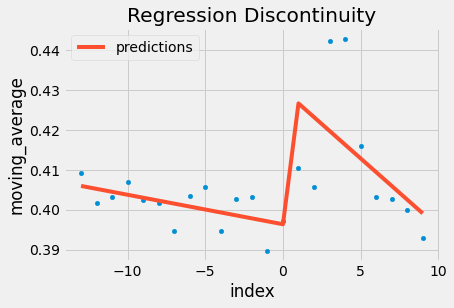

In [ ]:
plt.style.use("fivethirtyeight")

ax = rdd_df1.plot.scatter(x="index", y="moving_average", color="C0")
rdd_df1.assign(predictions=model.fittedvalues).plot(x="index", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity");

### Visualization

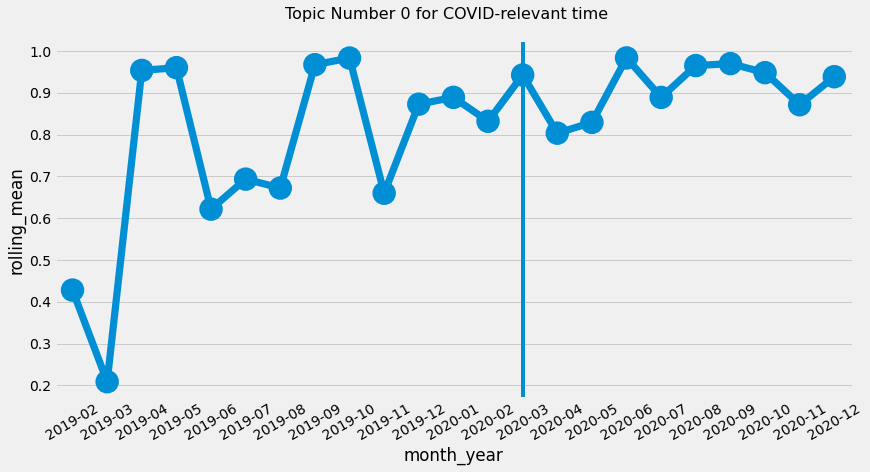

<Figure size 3600x216 with 0 Axes>

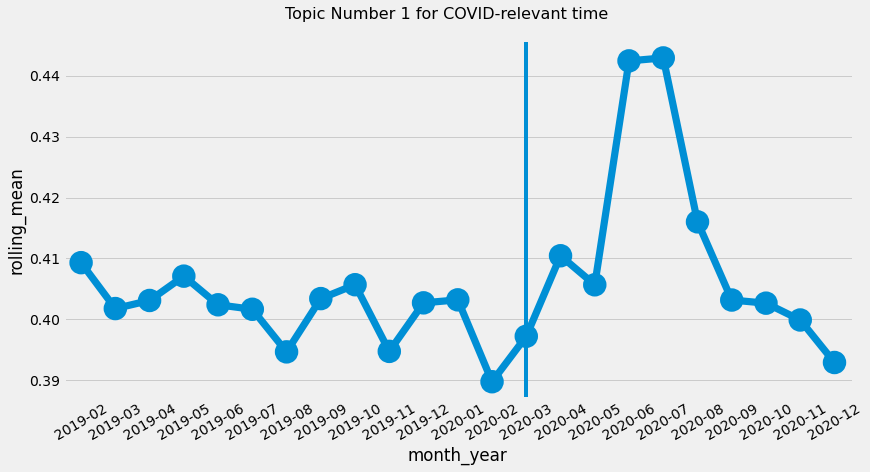

<Figure size 3600x216 with 0 Axes>

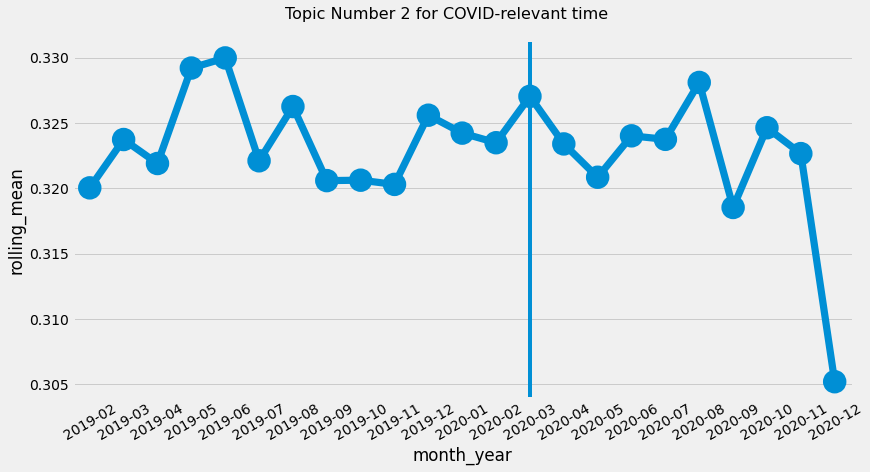

<Figure size 3600x216 with 0 Axes>

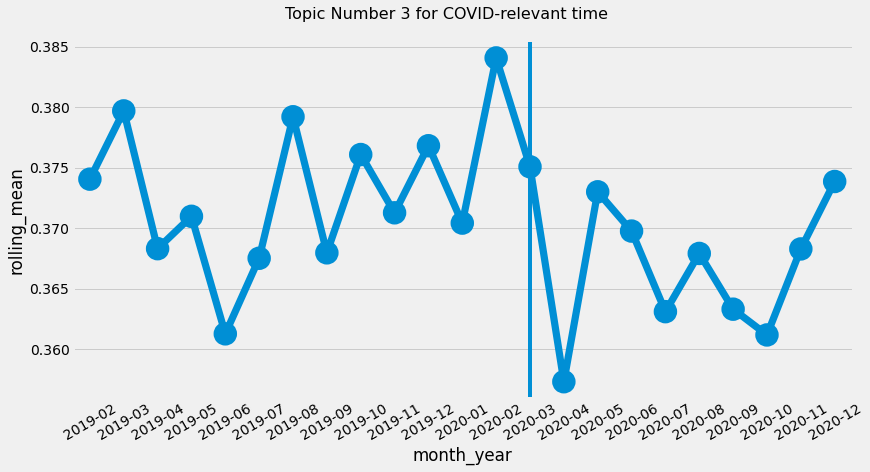

<Figure size 3600x216 with 0 Axes>

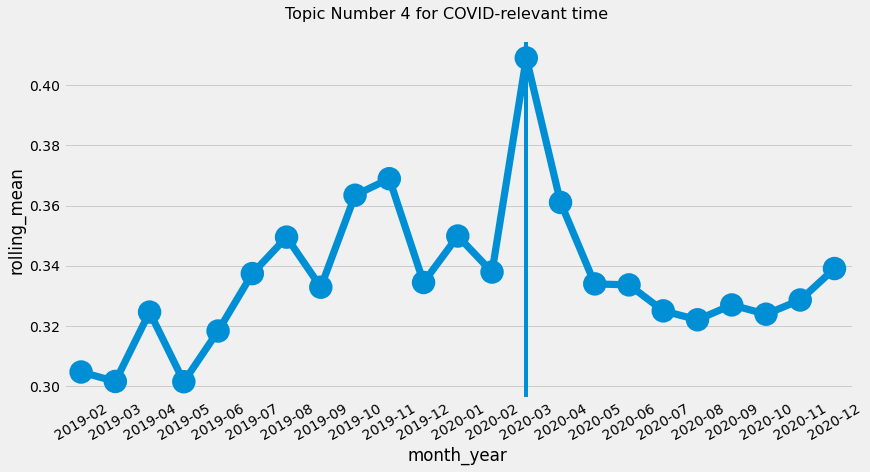

<Figure size 3600x216 with 0 Axes>

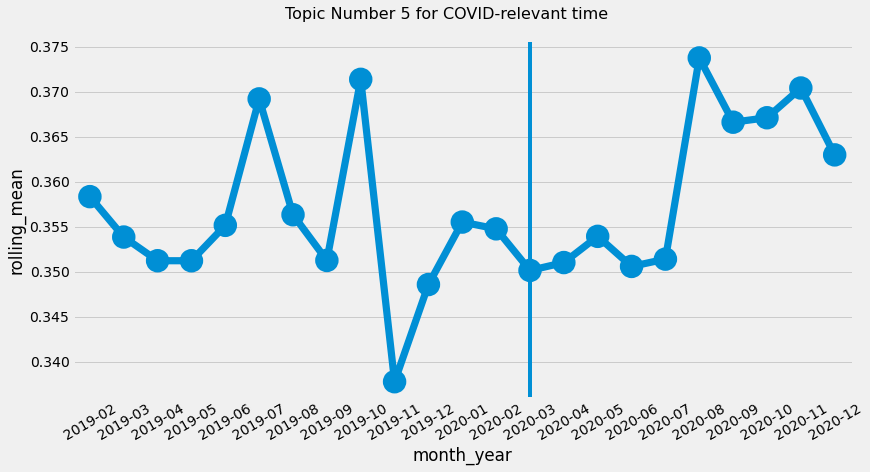

<Figure size 3600x216 with 0 Axes>

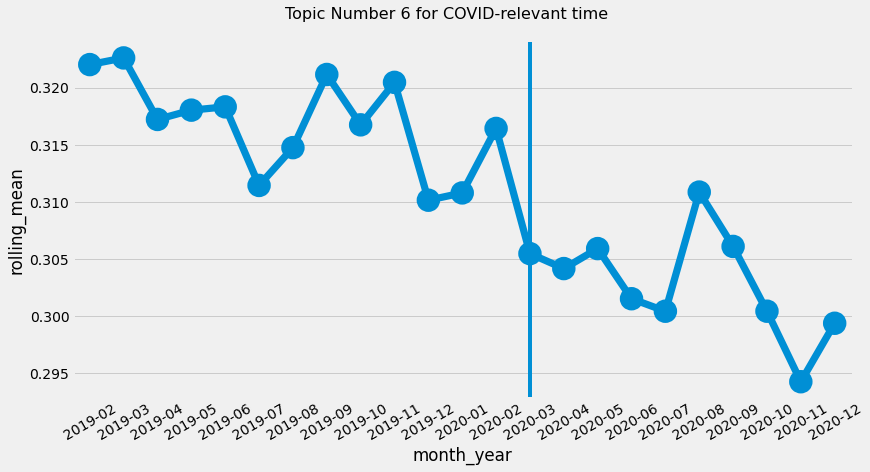

<Figure size 3600x216 with 0 Axes>

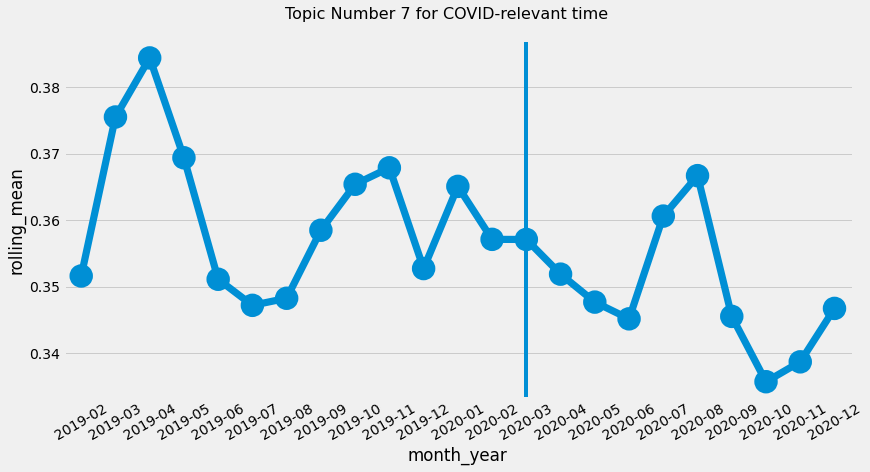

<Figure size 3600x216 with 0 Axes>

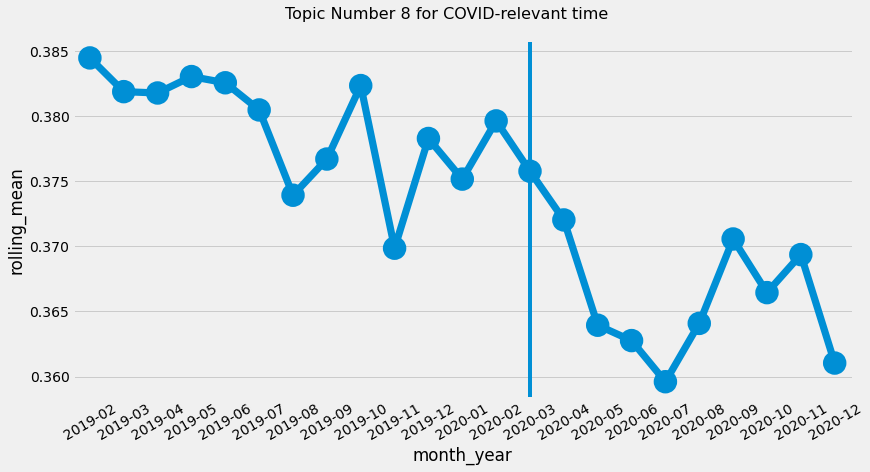

<Figure size 3600x216 with 0 Axes>

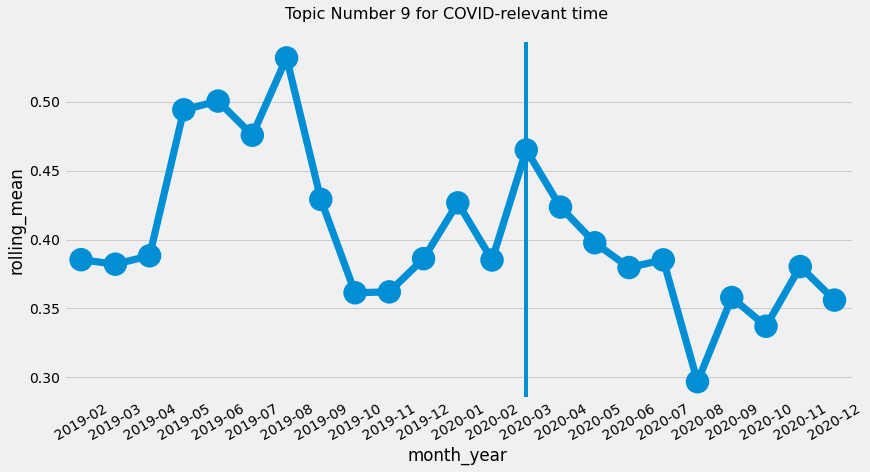

<Figure size 3600x216 with 0 Axes>

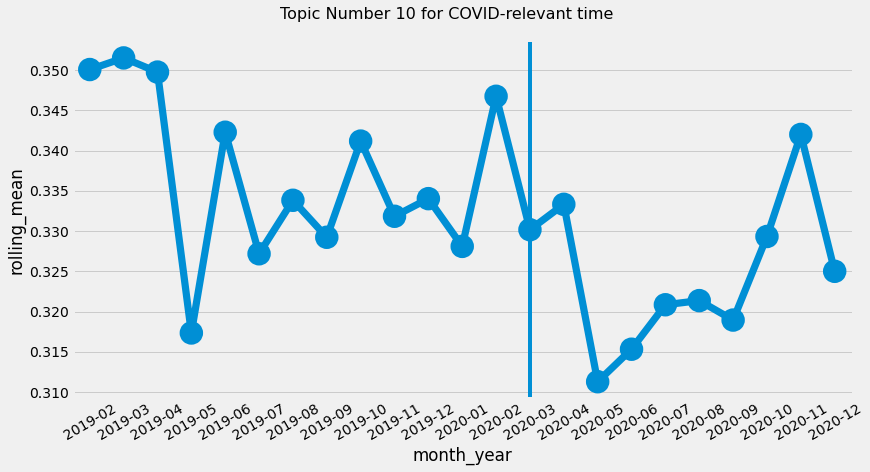

<Figure size 3600x216 with 0 Axes>

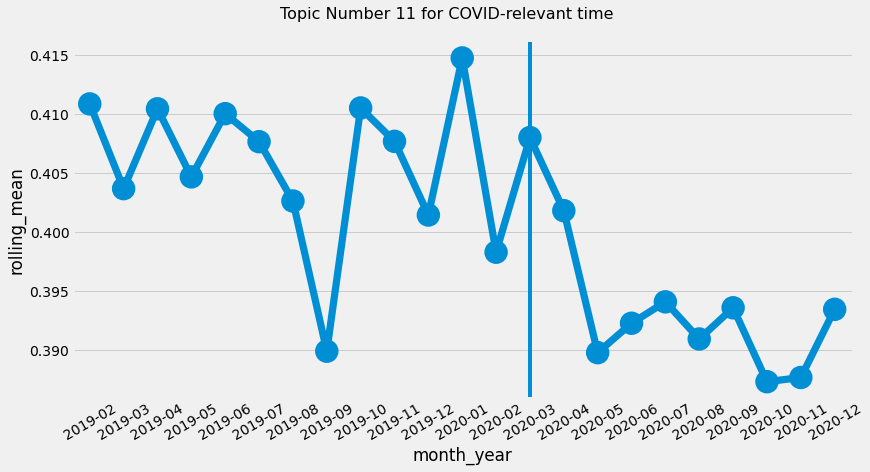

<Figure size 3600x216 with 0 Axes>

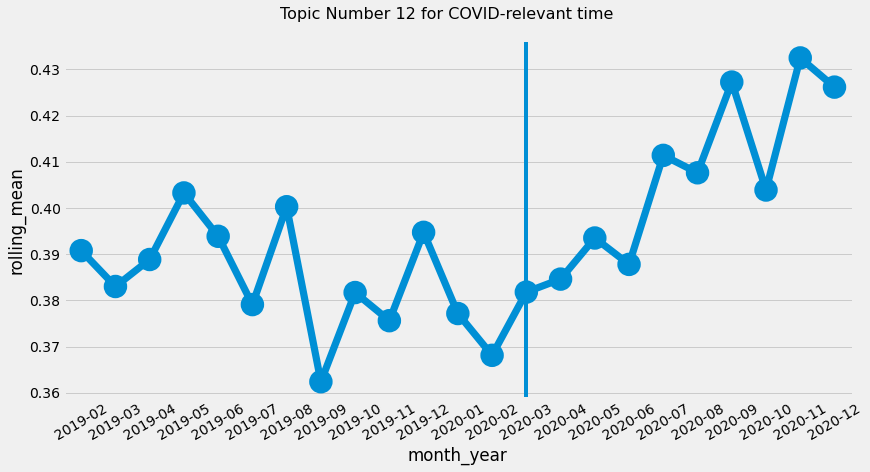

<Figure size 3600x216 with 0 Axes>

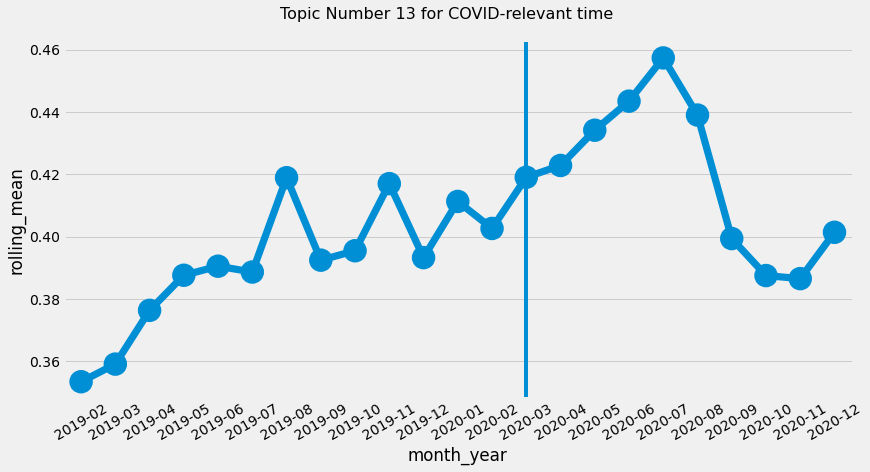

<Figure size 3600x216 with 0 Axes>

In [ ]:
def covid_rolling_mean_topic_weight(Topic_Num):
  def create_plotpoint(df, y_value, hue=None, col=None, wrap=None, size=6, aspect=2, title=f'Topic Number {Topic_Num} for COVID-relevant time'):
        p = sns.factorplot(x="month_year", y=y_value, kind='point', 
                        hue=hue, 
                       col=col, col_wrap=wrap, 
                       size=size, aspect=aspect, data=df)
        plt.axvline(13)
        plt.figure(figsize=(50, 3))
        p.set_xticklabels(rotation=30)
        p.fig.subplots_adjust(top=0.9)
        p.fig.suptitle(title, fontsize=16)
        return p
        
  t = df_covid.query(f'Topic_Num == {Topic_Num}')
  tgrouped = t.groupby('month_year')['max_prob'].mean()
  t_rolling = tgrouped.rolling(1).mean().reset_index()
  t_rolling.columns = ['month_year', 'rolling_mean']
  create_plotpoint(t_rolling, 'rolling_mean')


for x in range(0,14):
  covid_rolling_mean_topic_weight(x)

### Formal Analysis for RDD: 

In [ ]:
list(le.classes_)[1]

'Bank Account Mismanagement: Deposits and Checks'

In [ ]:
df_for1  = df_covid[df_covid['Topic_Num'] == 1].groupby('month_year')['max_prob'].mean().rolling(1).mean().reset_index()

df_for1.columns = ['month_year', 'moving_average']

In [ ]:
rdd_df1 = df_for1.assign(threshold=(df_for2["month_year"] > '2020-03').astype(int))

In [ ]:
rdd_df1['index'] = rdd_df4.index

In [ ]:
rdd_df1['index'] -= 13

In [ ]:
rdd_df1

,month_year,moving_average,threshold,index
0,2019-02,0.409300,0,-13
1,2019-03,0.401753,0,-12
2,2019-04,0.403082,0,-11
3,2019-05,0.407084,0,-10
4,2019-06,0.402374,0,-9
5,2019-07,0.401636,0,-8
6,2019-08,0.394631,0,-7
7,2019-09,0.403391,0,-6
8,2019-10,0.405675,0,-5
9,2019-11,0.394712,0,-4


In [ ]:
import statsmodels.formula.api as smf

model = smf.ols("moving_average~index*threshold", rdd_df1).fit()

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.3964,0.005,73.513,0.000,0.385,0.408
index,-0.0007,0.001,-1.050,0.307,-0.002,0.001
threshold,0.0338,0.009,3.588,0.002,0.014,0.054
index:threshold,-0.0027,0.002,-1.757,0.095,-0.006,0.001


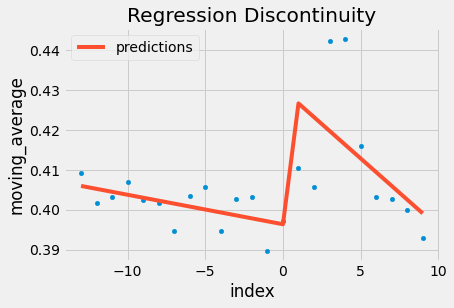

In [ ]:
plt.style.use("fivethirtyeight")

ax = rdd_df1.plot.scatter(x="index", y="moving_average", color="C0")
rdd_df1.assign(predictions=model.fittedvalues).plot(x="index", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity");

In [ ]:
model.params["threshold"] #Average Treatment Effect

0.033795491463893906

In [ ]:
model.params["Intercept"]

0.3963623416328083

**Why this formula?** 

Let's go back to OLS Interpretations; because in effect, we are comparing two OLS regressions, one before COVID hit (i.e., `threshold` = 0) and one after COVID hit (i.e., `threshold` = 1) . 

Easy Interpretation of Average Treatment Effect -- Interpretation of `Threshold` Dummy Variable: Net of `index`, on average, after COVID hit, topic is of 0.0338 topic weight units higher.

Intercept Interpretation: At the threshold in this time-series (`Index` = 0), just at the point when COVID hit (i.e., i.e., `threshold` = 0), the moving average value for Topic Weight.

We can also calculate the Average Treatment Effect as a **percentage change from the value before the treatment**: 

In [ ]:
(model.params["threshold"] + model.params["Intercept"])/model.params["Intercept"]

1.0852641331279704

In [ ]:
ate_pct = 100*((model.params["threshold"] + model.params["Intercept"])/model.params["Intercept"] - 1)
print("Impact of COVID on Topic Weight: " + str(np.round(ate_pct, 3)) + "%")

Impact of COVID on Topic Weight: 8.526%


In [ ]:
from statsmodels.stats.outliers_influence import summary_table

st, data, ss2 = summary_table(model, alpha=0.05)

predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T

In [ ]:
predict_mean_ci_low

array([0.39470148, 0.39518496, 0.3955919 , 0.3958888 , 0.39602655,
       0.39593876, 0.39555128, 0.39481095, 0.39371778, 0.39232493,
       0.39070653, 0.38892899, 0.38704139, 0.38507727, 0.41302817,
       0.4118835 , 0.41042075, 0.40839771, 0.40548338, 0.40149519,
       0.3966157 , 0.39117593, 0.38541809])

In [ ]:
predict_mean_ci_upp

array([0.41727163, 0.4153075 , 0.41341991, 0.41164237, 0.41002396,
       0.40863111, 0.40753794, 0.40679762, 0.40641014, 0.40632234,
       0.4064601 , 0.40675699, 0.40716394, 0.40764741, 0.44038497,
       0.43462713, 0.42918736, 0.42430788, 0.42031968, 0.41740535,
       0.41538231, 0.41391956, 0.41277489])

In [ ]:
def rdd_for_topics(Topic_Num):
  import statsmodels.formula.api as smf
  df = df_covid[df_covid['Topic_Num'] == Topic_Num].groupby('month_year')['max_prob'].mean().rolling(1).mean().reset_index()
  df.columns = ['month_year', 'moving_average']
  rdd_df = df.assign(threshold=(df["month_year"] > '2020-03').astype(int))
  rdd_df['index'] = rdd_df.index
  rdd_df['index'] -= 13
  m = smf.ols("moving_average~index*threshold", rdd_df).fit()
  return m.summary().tables[1] 

In [ ]:
for x in range (0, 14):
  print(f'Topic Number {x}')
  print(rdd_for_topics(x))

Topic Number 0
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9594      0.083     11.500      0.000       0.785       1.134
index               0.0302      0.011      2.764      0.012       0.007       0.053
threshold          -0.1046      0.146     -0.718      0.482      -0.410       0.200
index:threshold    -0.0189      0.024     -0.790      0.440      -0.069       0.031
Topic Number 1
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3964      0.005     73.513      0.000       0.385       0.408
index              -0.0007      0.001     -1.050      0.307      -0.002       0.001
threshold           0.0338      0.009      3.588      0.002       0.014       0.054
index:threshold    -0.0027      0.002     -1.7

Looks like Topics 1, 3, 4, 8, 13 are worth exploring for COVID effects on Topic Weight.



That's: 

In [ ]:
for x in [1, 3, 4, 8, 13]:
  print(list(le.classes_)[x])

Bank Account Mismanagement: Deposits and Checks
Credit Card Promotions/Offers
Credit Report Inaccuracies
Harassment, Robo-calls
Unauthorised Accounts and Credit Inquiries


In [ ]:
def get_threshold_coeffs_rdd_for_topics(Topic_Num):
  import statsmodels.formula.api as smf
  df = df_covid[df_covid['Topic_Num'] == Topic_Num].groupby('month_year')['max_prob'].mean().rolling(1).mean().reset_index()
  df.columns = ['month_year', 'moving_average']
  rdd_df = df.assign(threshold=(df["month_year"] > '2020-03').astype(int))
  rdd_df['index'] = rdd_df.index
  rdd_df['index'] -= 13
  m = smf.ols("moving_average~index*threshold", rdd_df).fit()
  return m.params["threshold"]

In [ ]:
for x in [1, 3, 4, 8, 13]:
  print(get_threshold_coeffs_rdd_for_topics(x))

0.033795491463893906
-0.012217542313695873
-0.03144948722264074
-0.008599594590952803
0.033110657334377874


Increase in Topic Weight for Bank Account Mismanagement after COVID: 
- Deposits and Checks
- Unauthorised Accounts and Credit Inquiries

Decrease in Topic Weight for after COVID:
- Credit Card Promotions/Offers
- Credit Report Inaccuracies
- Harassment, Robo-calls

### Kernel Approach (Weighted Linear Regression)

In [ ]:
def kernel(R, c, h):
    indicator = (np.abs(R-c) <= h).astype(float)
    return indicator * (1 - np.abs(R-c)/h)

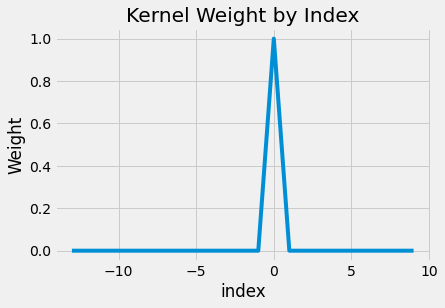

In [ ]:
plt.plot(rdd_df2["index"], kernel(rdd_df2["index"], c=0, h=1))
plt.xlabel("index")
plt.ylabel("Weight")
plt.title("Kernel Weight by Index");